# K-Nearest Neighbour Algorithm

In [71]:
# Predicting revenue based on budget and popularity

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Data Preprocessing

In [75]:
data = pd.read_csv('movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [76]:
# Data cleaning

dataset = data[['budget','popularity','revenue']].copy()


dataset.dropna(inplace=True)
dataset.head()

,budget,popularity,revenue
0,237000000,150.437577,2787965087
1,300000000,139.082615,961000000
2,245000000,107.376788,880674609
3,250000000,112.312950,1084939099
4,260000000,43.926995,284139100


In [77]:
# Create a binary target variable based on median revenue
median_revenue = dataset['revenue'].median()
dataset['high_revenue'] = (dataset['revenue'] > median_revenue).astype(int)

In [78]:
X = dataset[['budget', 'popularity']]
y = dataset['high_revenue']

In [79]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Normalize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
# Train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
# Predict the test set
y_pred = knn_classifier.predict(x_test)

In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred)

In [84]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n",con_mat)
print("Classification Report:\n", class_report)

Accuracy: 0.8376690946930281
Confusion Matrix:
 [[403  88]
 [ 68 402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       491
           1       0.82      0.86      0.84       470

    accuracy                           0.84       961
   macro avg       0.84      0.84      0.84       961
weighted avg       0.84      0.84      0.84       961



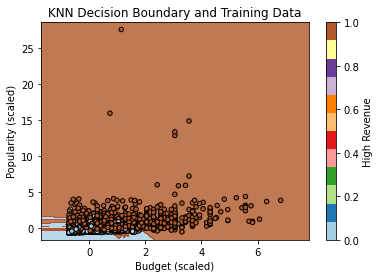

In [85]:
# Create a mesh grid for plotting decision boundaries
h = .02 
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', s=20, cmap=plt.cm.Paired)
plt.xlabel("Budget (scaled)")
plt.ylabel("Popularity (scaled)")
plt.title("KNN Decision Boundary and Training Data")
plt.colorbar(label="High Revenue")
plt.show()